### Data Description

The World Happiness Report is survey of the state of global happiness. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.
The happiness scores and rankings use data from the Gallup World Poll. Dystopia, here is an imaginary country that has the world’s least-happy people. It is a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.
The following columns: GDP per Capita, Family, Life Expectancy, Freedom, Generosity, Trust Government Corruption describe the extent to which these factors contribute in evaluating the happiness in each country.
Dystopia Residual = Dystopia Happiness Score(1.85) + the Residual value

### Importing Required Libraries

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [57]:
data= pd.read_csv(r"happiness_score_dataset.csv")
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [58]:
data.drop_duplicates(inplace=True)

In [59]:
data.shape

(158, 12)

data has 158 rows and 12 columns

In [60]:
data.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


We dont observe any discrepency here in described data

In [61]:
data.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 16.0+ KB


Hence Data does not have any null value and all features are numeric except "Country" and "Region".

#### Checking Distribution of data

In [63]:
df= data.drop(columns=["Country","Region"], axis=1)

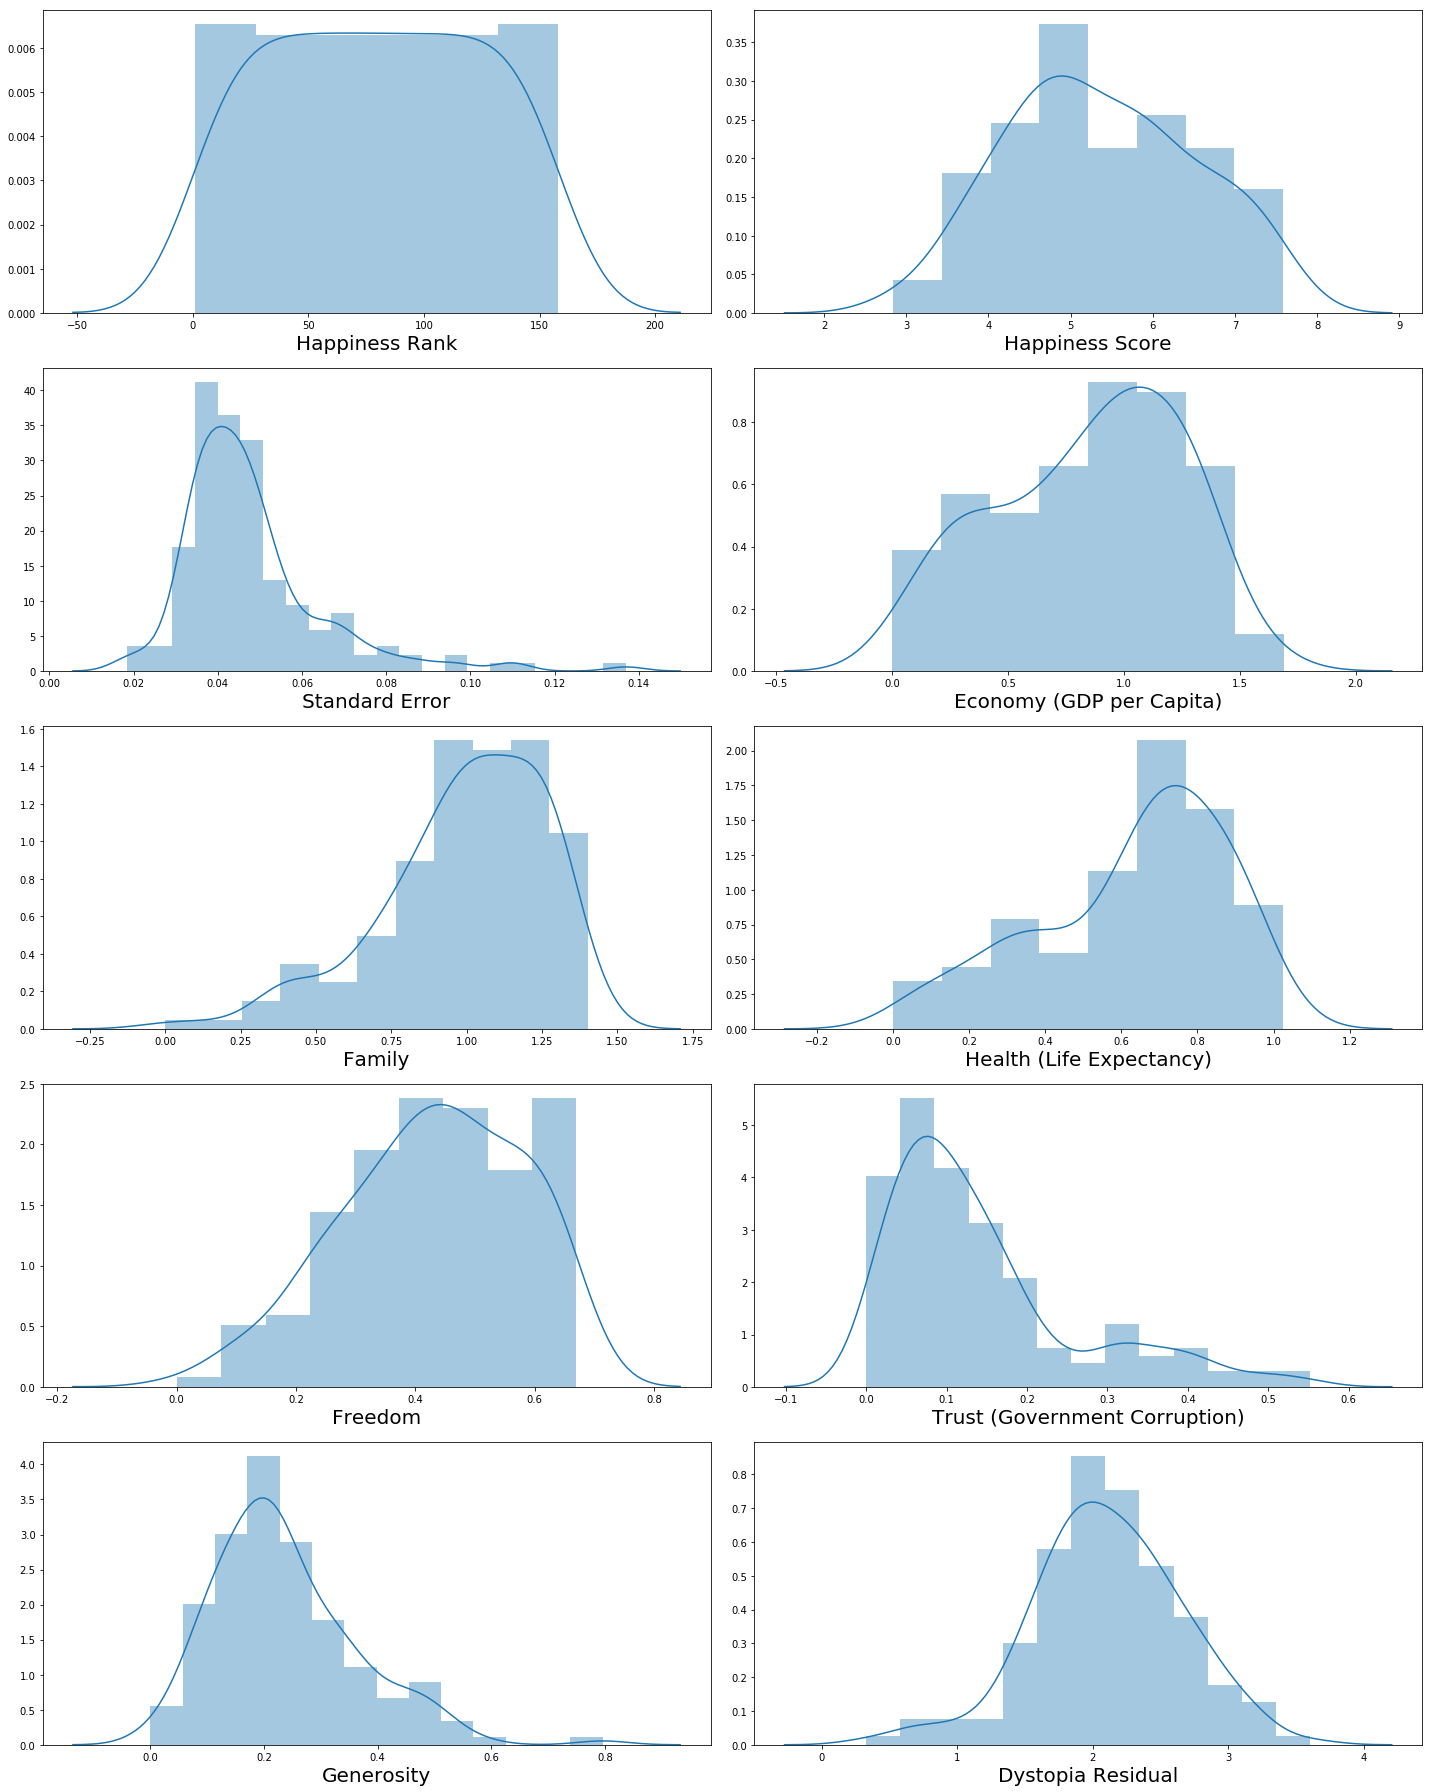

In [64]:
## Plotting
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

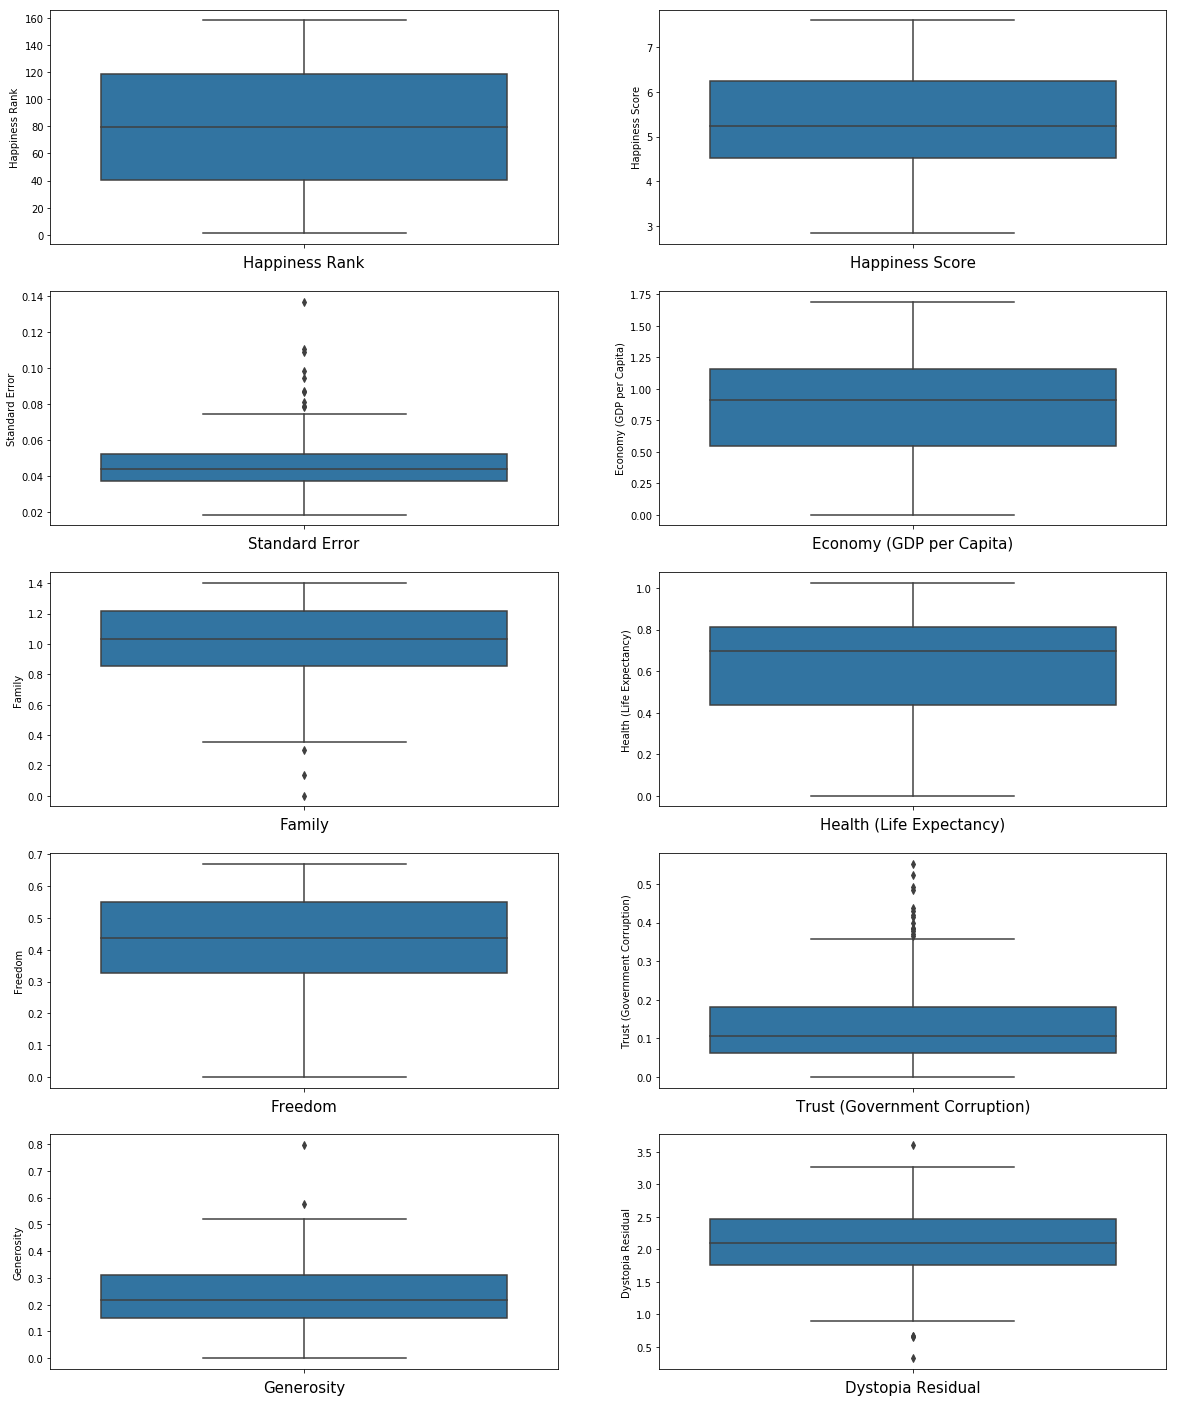

In [65]:
## Detecting outliers using boxplot
plt.figure(figsize=(20,25))
graph=1
for col in df:
    if graph<=10:
        ax=plt.subplot(5,2,graph)
        sns.boxplot(df[col],orient='v')
        plt.xlabel(col, fontsize=15)
    graph+=1
plt.show()

From the above multivariate analysis we observe outliers and skewness in data but we dont want to loose more of our data so we'll proceed with our EDA part and check for correlation

### Check for Correlation

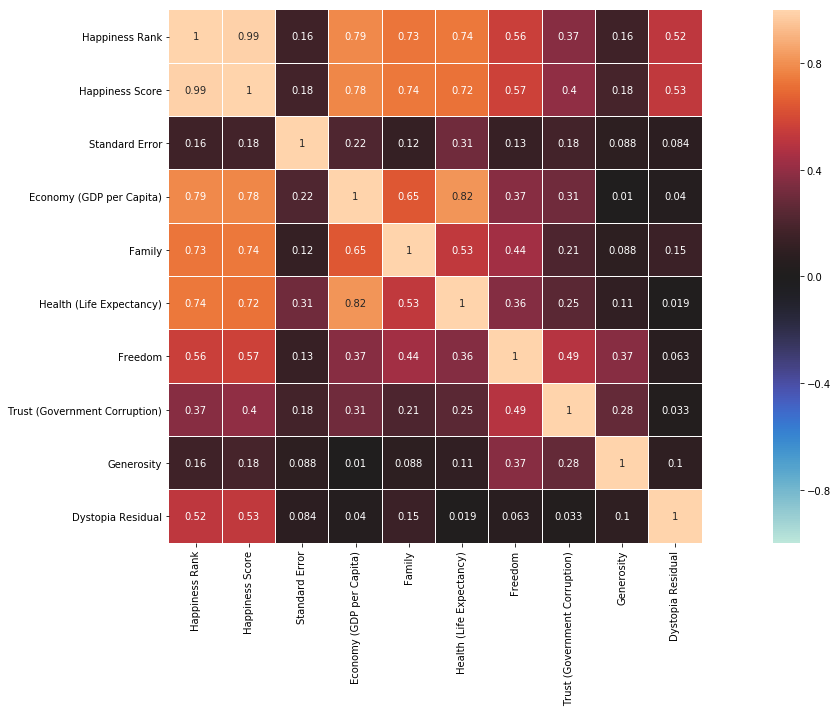

In [66]:
## HeatMap
corr= df.corr().abs()
plt.figure(figsize=(20,10))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

From heat map we observe that GDP of country and health are somewhat correlated. We'll now check the relation using scatterplot 

Also Family, Health and GDP are the major factors effecting to the happiness score (with correlation >0.7)

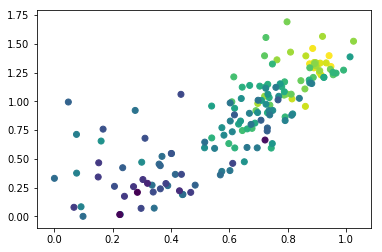

In [67]:
plt.scatter(x=data["Health (Life Expectancy)"], y= data["Economy (GDP per Capita)"], c= data["Happiness Score"])

From above plot we observe that Economy and health of a country are related are related

#### Family v/s Happiness Score

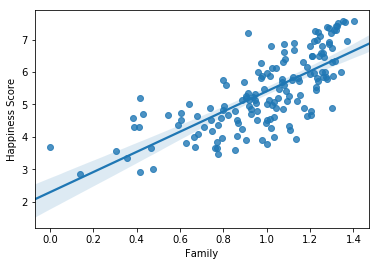

In [68]:
sns.regplot(x="Family", y="Happiness Score", data= data)

#### Health (Life Expectancy) v/s Happiness Score

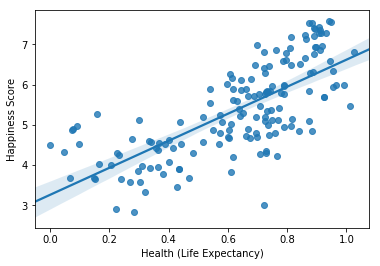

In [69]:
sns.regplot(x="Health (Life Expectancy)", y= "Happiness Score", data = data)

#### Economy(GDP per capita) v/s Happiness Score

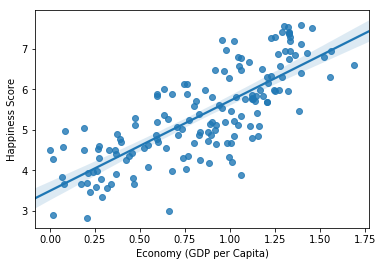

In [70]:
sns.regplot(x= "Economy (GDP per Capita)", y= "Happiness Score", data=data)

The above regression plots shows how GDP, Family and Health are  effecting Happiness Score

In [71]:
count= data["Region"].value_counts()
count

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

In [72]:
region=["Sub-Saharan Africa","Central and Eastern Europe","Latin America and Caribbean",
        "Western Europe","Middle East and Northern Africa","Southeastern Asia","Southern Asia",
        "Eastern Asia","North America","Australia and New Zealand"]
l=[]
for i in region:
    index= np.where(data["Region"]==i)
    l.append(data["Happiness Score"].loc[index].mean())

In [73]:
region_df=pd.DataFrame()
region_df["region"]=region
region_df["Score"]=l
print("Region with their average score: \n")
region_df

Region with their average score: 



,region,Score
0,Sub-Saharan Africa,4.202800
1,Central and Eastern Europe,5.332931
2,Latin America and Caribbean,6.144682
3,Western Europe,6.689619
4,Middle East and Northern Africa,5.406900
5,Southeastern Asia,5.317444
6,Southern Asia,4.580857
7,Eastern Asia,5.626167
8,North America,7.273000
9,Australia and New Zealand,7.285000


Plotting Happiness Score in different Regions

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

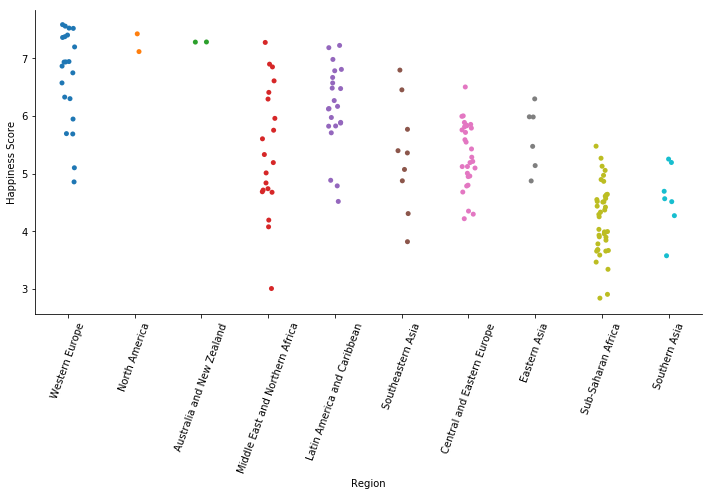

In [74]:
sns.catplot(x="Region", y= "Happiness Score", data= data, aspect=2)
plt.xticks(rotation=70)

### Model Building

In [75]:
data= data.drop(columns=["Happiness Rank","Country","Region"],axis=1)

In [76]:
x=data.drop(columns=["Happiness Score"],axis=1)
y= data["Happiness Score"]

In [77]:
scaler= StandardScaler()
x_scaled= scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=355)

#### Linear Regression

In [78]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
lm.score(x_test,y_test)

0.9999999534255134

Since our model is giving accuracy too very close to 100% we'll use Regularization techniques to check for overfitting

In [79]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.9999999406680472

Our accuracy is almost same thus or model is not overfitting

#### KNeighbors Regression

In [80]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
knn.score(x_test,y_test)

0.8765152282833643

#### DecisionTree Regression

In [81]:
clf= DecisionTreeRegressor()
clf.fit(x_train, y_train)
y_pred= clf.predict(x_test)
clf.score(x_test,y_test)

0.8072977407405623

#### Support Vector Regression

In [82]:
svr= SVR()
svr.fit(x_train,y_train)
y_pred= svr.predict(x_test)
svr.score(x_test,y_test)

0.9131628894105741

### Model Evaluation

Computing Cross Validation Score for each model

#### Linear Regression

In [83]:
cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()

0.9999998995886299

#### KNeighbors Regression

In [84]:
cross_val_score(knn,x_train, y_train,cv=5).mean()

0.864147159013965

#### DecisionTree Regression

In [85]:
cross_val_score(clf,x_train, y_train,cv=5).mean()

0.6403915138211433

#### Support Vector Regression

In [86]:
cross_val_score(svr,x_train, y_train,cv=5).mean()

0.9264636047590861

Lasso Linear Regression Model has highest cross validation score

### Hyper-parametric Tuning

In [87]:
lasso_reg= LassoCV()
param={'fit_intercept':[True,False], 'normalize':[True,False],
      'max_iter':[100,1000,500], 'eps':[0.001,0.002,0.003],}
grid_search=GridSearchCV(estimator=lasso_reg, param_grid=param, cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)
best_parameter=grid_search.best_params_
print(best_parameter)

{'eps': 0.001, 'fit_intercept': True, 'max_iter': 100, 'normalize': True}


In [88]:
lasso_reg= LassoCV(eps=0.001,fit_intercept=True, max_iter=100, normalize=True)
lasso_reg.fit(x_train,y_train)
y_pred= lasso_reg.predict(x_test)
print("R2 Score= ",r2_score(y_test,y_pred))

R2 Score=  0.9999980686592813


In [89]:
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Mean Squared Error=  2.8309151607417677e-06


### Saving Model

In [90]:
filename= "HappinessReport_model.pickle"
pickle.dump(clf,open(filename,'wb'))